<a href="https://colab.research.google.com/github/gkdivya/EVA/blob/main/7_AdvancedConcepts/CIFAR10_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install git+https://github.com/albumentations-team/albumentations.git
!pip install torchsummary

  Cloning https://github.com/albumentations-team/albumentations.git to /tmp/pip-req-build-ba82ds84
  Running command git clone -q https://github.com/albumentations-team/albumentations.git /tmp/pip-req-build-ba82ds84
  Created wheel for albumentations: filename=albumentations-1.0.0-cp37-none-any.whl size=98151 sha256=8795f0f3879d9ee34421ae65d1659014721f9b9d702912d6a61526d05259e967
  Stored in directory: /tmp/pip-ephem-wheel-cache-imvy3csh/wheels/e2/85/3e/2a40fac5cc1f43ced656603bb2fca1327b30ec7de1b1b66517
Successfully built albumentations
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
from __future__ import print_function
BASE_DIR='/content/drive/MyDrive/cifar10'
%cd $BASE_DIR
from utils import plot_metrics,train,test,helper
from model import model
import torch
from pprint import pprint

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt



from dataloader.load_data import Cifar10DataLoader
from utils.engine import TriggerEngine

/content/drive/MyDrive/cifar10


## Load config file

In [ ]:
config = helper.process_config("./config/config.yaml")
use_cuda = torch.cuda.is_available()
helper.set_seed(config['model_params']['seed'],use_cuda)
device = torch.device("cuda" if use_cuda else "cpu")

pprint(config)

 loading Configuration of your experiment ..
{'criterion': 'CrossEntropyLoss',
 'data_augmentation': {'args': {'cutout_prob': 0.5,
                                'horizontalflip_prob': 0.2,
                                'num_holes': 1,
                                'rotate_limit': 15,
                                'shiftscalerotate_prob': 0.25},
                       'type': 'albumentation'},
 'data_loader': {'args': {'batch_size': 256,
                          'num_workers': 2,
                          'pin_memory': True},
                 'classes': ['plane',
                             'car',
                             'bird',
                             'cat',
                             'deer',
                             'dog',
                             'frog',
                             'horse',
                             'ship',
                             'truck'],
                 'type': 'CIFAR10DataLoader'},
 'model': 'cifar10',
 'model_params': {'dr

## Download data and view sample images

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


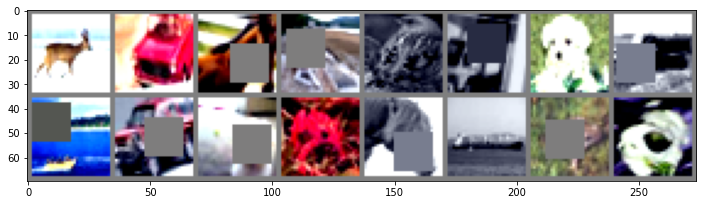

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision 

# functions to show an image
cifar_dataset=Cifar10DataLoader(config)
classes= config['data_loader']['classes']
fig, ax = plt.subplots(figsize=(12, 12))

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(cifar_dataset.train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:16]))

## Trigger training

In [ ]:
exp_metrics={}
experiment_name=config['model_params']['experiment_name']

trigger_training=TriggerEngine(config)

# trigger_training.
(exp_metrics[experiment_name]),model = trigger_training.run_experiment()
trigger_training.save_experiment(model,experiment_name)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 1:


Loss=1.7863439321517944 Batch_id=195 LR=0.00043 Accuracy=29.38: 100%|██████████| 196/196 [00:13<00:00, 14.12it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 4407/10000 (44.07%)

Epoch 2:


Loss=1.643991470336914 Batch_id=195 LR=0.00053 Accuracy=42.44: 100%|██████████| 196/196 [00:13<00:00, 14.37it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 5130/10000 (51.30%)

Epoch 3:


Loss=1.4447150230407715 Batch_id=195 LR=0.00069 Accuracy=48.77: 100%|██████████| 196/196 [00:13<00:00, 14.22it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 5721/10000 (57.21%)

Epoch 4:


Loss=1.2343745231628418 Batch_id=195 LR=0.00091 Accuracy=53.99: 100%|██████████| 196/196 [00:13<00:00, 14.38it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 6246/10000 (62.46%)

Epoch 5:


Loss=1.2901214361190796 Batch_id=195 LR=0.00119 Accuracy=57.89: 100%|██████████| 196/196 [00:13<00:00, 14.13it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 6572/10000 (65.72%)

Epoch 6:


Loss=1.2879852056503296 Batch_id=195 LR=0.00152 Accuracy=60.58: 100%|██████████| 196/196 [00:13<00:00, 14.27it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 6807/10000 (68.07%)

Epoch 7:


Loss=0.9529579877853394 Batch_id=195 LR=0.00191 Accuracy=62.38: 100%|██████████| 196/196 [00:13<00:00, 14.29it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 7089/10000 (70.89%)

Epoch 8:


Loss=1.1316957473754883 Batch_id=195 LR=0.00233 Accuracy=63.88: 100%|██████████| 196/196 [00:13<00:00, 14.27it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 6908/10000 (69.08%)

Epoch 9:


Loss=1.1035102605819702 Batch_id=195 LR=0.00280 Accuracy=65.05: 100%|██████████| 196/196 [00:14<00:00, 13.95it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7216/10000 (72.16%)

Epoch 10:


Loss=0.9383977055549622 Batch_id=195 LR=0.00330 Accuracy=65.97: 100%|██████████| 196/196 [00:14<00:00, 13.92it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7209/10000 (72.09%)

Epoch 11:


Loss=1.2825467586517334 Batch_id=195 LR=0.00382 Accuracy=66.89: 100%|██████████| 196/196 [00:14<00:00, 13.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7314/10000 (73.14%)

Epoch 12:


Loss=0.9280669093132019 Batch_id=195 LR=0.00437 Accuracy=67.55: 100%|██████████| 196/196 [00:14<00:00, 13.65it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7533/10000 (75.33%)

Epoch 13:


Loss=0.8591944575309753 Batch_id=195 LR=0.00492 Accuracy=68.07: 100%|██████████| 196/196 [00:14<00:00, 13.62it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 7247/10000 (72.47%)

Epoch 14:


Loss=1.035975694656372 Batch_id=195 LR=0.00548 Accuracy=68.53: 100%|██████████| 196/196 [00:14<00:00, 13.81it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7504/10000 (75.04%)

Epoch 15:


Loss=0.8850709795951843 Batch_id=195 LR=0.00604 Accuracy=69.02: 100%|██████████| 196/196 [00:13<00:00, 14.11it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7570/10000 (75.70%)

Epoch 16:


Loss=0.9050224423408508 Batch_id=195 LR=0.00658 Accuracy=69.56: 100%|██████████| 196/196 [00:13<00:00, 14.12it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7583/10000 (75.83%)

Epoch 17:


Loss=0.789880633354187 Batch_id=195 LR=0.00710 Accuracy=69.55: 100%|██████████| 196/196 [00:13<00:00, 14.22it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7575/10000 (75.75%)

Epoch 18:


Loss=1.0201544761657715 Batch_id=195 LR=0.00760 Accuracy=69.59: 100%|██████████| 196/196 [00:14<00:00, 13.77it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7548/10000 (75.48%)

Epoch 19:


Loss=0.7376900315284729 Batch_id=195 LR=0.00807 Accuracy=70.00: 100%|██████████| 196/196 [00:14<00:00, 13.95it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7612/10000 (76.12%)

Epoch 20:


Loss=1.0414338111877441 Batch_id=195 LR=0.00850 Accuracy=70.55: 100%|██████████| 196/196 [00:13<00:00, 14.13it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 7360/10000 (73.60%)

Epoch 21:


Loss=0.7892434000968933 Batch_id=195 LR=0.00888 Accuracy=70.49: 100%|██████████| 196/196 [00:14<00:00, 13.85it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7429/10000 (74.29%)

Epoch 22:


Loss=0.9433385133743286 Batch_id=195 LR=0.00921 Accuracy=70.69: 100%|██████████| 196/196 [00:13<00:00, 14.21it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7501/10000 (75.01%)

Epoch 23:


Loss=0.7301747798919678 Batch_id=195 LR=0.00949 Accuracy=70.91: 100%|██████████| 196/196 [00:13<00:00, 14.11it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7590/10000 (75.90%)

Epoch 24:


Loss=0.7873011827468872 Batch_id=195 LR=0.00971 Accuracy=71.13: 100%|██████████| 196/196 [00:13<00:00, 14.04it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7566/10000 (75.66%)

Epoch 25:


Loss=1.0374395847320557 Batch_id=195 LR=0.00987 Accuracy=71.22: 100%|██████████| 196/196 [00:14<00:00, 13.96it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7663/10000 (76.63%)

Epoch 26:


Loss=0.7670177221298218 Batch_id=195 LR=0.00997 Accuracy=71.32: 100%|██████████| 196/196 [00:13<00:00, 14.02it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7750/10000 (77.50%)

Epoch 27:


Loss=0.8616105318069458 Batch_id=195 LR=0.01000 Accuracy=71.37: 100%|██████████| 196/196 [00:14<00:00, 13.80it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7646/10000 (76.46%)

Epoch 28:


Loss=0.8340059518814087 Batch_id=195 LR=0.00999 Accuracy=71.62: 100%|██████████| 196/196 [00:14<00:00, 13.96it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 7442/10000 (74.42%)

Epoch 29:


Loss=0.7241061925888062 Batch_id=195 LR=0.00998 Accuracy=71.75: 100%|██████████| 196/196 [00:14<00:00, 13.77it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7735/10000 (77.35%)

Epoch 30:


Loss=0.6961734890937805 Batch_id=195 LR=0.00994 Accuracy=71.98: 100%|██████████| 196/196 [00:14<00:00, 13.94it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7581/10000 (75.81%)

Epoch 31:


Loss=0.8051748275756836 Batch_id=195 LR=0.00990 Accuracy=72.05: 100%|██████████| 196/196 [00:14<00:00, 13.89it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7586/10000 (75.86%)

Epoch 32:


Loss=0.7151428461074829 Batch_id=195 LR=0.00985 Accuracy=72.07: 100%|██████████| 196/196 [00:14<00:00, 13.88it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7687/10000 (76.87%)

Epoch 33:


Loss=1.0243922472000122 Batch_id=195 LR=0.00978 Accuracy=71.90: 100%|██████████| 196/196 [00:14<00:00, 13.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7807/10000 (78.07%)

Epoch 34:


Loss=0.7045131325721741 Batch_id=195 LR=0.00970 Accuracy=72.31: 100%|██████████| 196/196 [00:14<00:00, 13.80it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7715/10000 (77.15%)

Epoch 35:


Loss=1.063346266746521 Batch_id=195 LR=0.00961 Accuracy=72.18: 100%|██████████| 196/196 [00:14<00:00, 13.76it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7492/10000 (74.92%)

Epoch 36:


Loss=0.952379584312439 Batch_id=195 LR=0.00950 Accuracy=72.33: 100%|██████████| 196/196 [00:14<00:00, 13.95it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 7832/10000 (78.32%)

Epoch 37:


Loss=0.7040458917617798 Batch_id=195 LR=0.00939 Accuracy=72.28: 100%|██████████| 196/196 [00:14<00:00, 13.82it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7624/10000 (76.24%)

Epoch 38:


Loss=1.0554664134979248 Batch_id=195 LR=0.00927 Accuracy=72.52: 100%|██████████| 196/196 [00:14<00:00, 13.96it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 7938/10000 (79.38%)

Epoch 39:


Loss=0.7914034128189087 Batch_id=195 LR=0.00913 Accuracy=72.71: 100%|██████████| 196/196 [00:13<00:00, 14.11it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7777/10000 (77.77%)

Epoch 40:


Loss=0.7701900005340576 Batch_id=195 LR=0.00898 Accuracy=72.85: 100%|██████████| 196/196 [00:13<00:00, 14.04it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7593/10000 (75.93%)

Epoch 41:


Loss=0.8713725209236145 Batch_id=195 LR=0.00883 Accuracy=73.10: 100%|██████████| 196/196 [00:13<00:00, 14.05it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7710/10000 (77.10%)

Epoch 42:


Loss=0.8375059962272644 Batch_id=195 LR=0.00866 Accuracy=72.86: 100%|██████████| 196/196 [00:14<00:00, 13.99it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7669/10000 (76.69%)

Epoch 43:


Loss=0.7520014047622681 Batch_id=195 LR=0.00849 Accuracy=73.42: 100%|██████████| 196/196 [00:14<00:00, 13.93it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7681/10000 (76.81%)

Epoch 44:


Loss=0.6803322434425354 Batch_id=195 LR=0.00831 Accuracy=73.52: 100%|██████████| 196/196 [00:14<00:00, 13.82it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7771/10000 (77.71%)

Epoch 45:


Loss=0.979954719543457 Batch_id=195 LR=0.00812 Accuracy=73.63: 100%|██████████| 196/196 [00:13<00:00, 14.05it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7793/10000 (77.93%)

Epoch 46:


Loss=0.7672444581985474 Batch_id=195 LR=0.00792 Accuracy=73.62: 100%|██████████| 196/196 [00:14<00:00, 13.92it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 7842/10000 (78.42%)

Epoch 47:


Loss=0.5693843364715576 Batch_id=195 LR=0.00771 Accuracy=73.86: 100%|██████████| 196/196 [00:13<00:00, 14.22it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7719/10000 (77.19%)

Epoch 48:


Loss=0.7910192012786865 Batch_id=195 LR=0.00750 Accuracy=74.16: 100%|██████████| 196/196 [00:14<00:00, 13.89it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7882/10000 (78.82%)

Epoch 49:


Loss=0.6887952089309692 Batch_id=195 LR=0.00728 Accuracy=74.19: 100%|██████████| 196/196 [00:14<00:00, 13.99it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8078/10000 (80.78%)

Epoch 50:


Loss=0.7709396481513977 Batch_id=195 LR=0.00706 Accuracy=74.63: 100%|██████████| 196/196 [00:14<00:00, 13.81it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8048/10000 (80.48%)

Epoch 51:


Loss=0.7380024790763855 Batch_id=195 LR=0.00683 Accuracy=74.62: 100%|██████████| 196/196 [00:14<00:00, 13.89it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8095/10000 (80.95%)

Epoch 52:


Loss=0.7158113121986389 Batch_id=195 LR=0.00659 Accuracy=74.97: 100%|██████████| 196/196 [00:14<00:00, 13.84it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8081/10000 (80.81%)

Epoch 53:


Loss=0.8777079582214355 Batch_id=195 LR=0.00635 Accuracy=74.98: 100%|██████████| 196/196 [00:14<00:00, 13.82it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8171/10000 (81.71%)

Epoch 54:


Loss=0.6576747894287109 Batch_id=195 LR=0.00611 Accuracy=75.12: 100%|██████████| 196/196 [00:14<00:00, 13.87it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8070/10000 (80.70%)

Epoch 55:


Loss=0.6961812376976013 Batch_id=195 LR=0.00587 Accuracy=75.47: 100%|██████████| 196/196 [00:14<00:00, 13.98it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 7976/10000 (79.76%)

Epoch 56:


Loss=0.7732640504837036 Batch_id=195 LR=0.00562 Accuracy=75.66: 100%|██████████| 196/196 [00:14<00:00, 13.82it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8040/10000 (80.40%)

Epoch 57:


Loss=0.7004727125167847 Batch_id=195 LR=0.00537 Accuracy=75.95: 100%|██████████| 196/196 [00:14<00:00, 13.89it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8095/10000 (80.95%)

Epoch 58:


Loss=0.5610059499740601 Batch_id=195 LR=0.00512 Accuracy=76.26: 100%|██████████| 196/196 [00:14<00:00, 13.90it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8153/10000 (81.53%)

Epoch 59:


Loss=0.7649127840995789 Batch_id=195 LR=0.00487 Accuracy=76.49: 100%|██████████| 196/196 [00:14<00:00, 13.85it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8182/10000 (81.82%)

Epoch 60:


Loss=0.6742063760757446 Batch_id=195 LR=0.00463 Accuracy=76.61: 100%|██████████| 196/196 [00:14<00:00, 13.87it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8266/10000 (82.66%)

Epoch 61:


Loss=0.5821956396102905 Batch_id=195 LR=0.00438 Accuracy=76.97: 100%|██████████| 196/196 [00:14<00:00, 13.84it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8208/10000 (82.08%)

Epoch 62:


Loss=0.5250812768936157 Batch_id=195 LR=0.00413 Accuracy=77.31: 100%|██████████| 196/196 [00:13<00:00, 14.06it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8281/10000 (82.81%)

Epoch 63:


Loss=0.74607253074646 Batch_id=195 LR=0.00389 Accuracy=77.71: 100%|██████████| 196/196 [00:14<00:00, 13.82it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8333/10000 (83.33%)

Epoch 64:


Loss=0.697485089302063 Batch_id=195 LR=0.00364 Accuracy=77.57: 100%|██████████| 196/196 [00:13<00:00, 14.09it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8375/10000 (83.75%)

Epoch 65:


Loss=0.8775724172592163 Batch_id=195 LR=0.00341 Accuracy=78.33: 100%|██████████| 196/196 [00:14<00:00, 13.92it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8266/10000 (82.66%)

Epoch 66:


Loss=0.5819722414016724 Batch_id=195 LR=0.00317 Accuracy=78.60: 100%|██████████| 196/196 [00:13<00:00, 14.02it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8302/10000 (83.02%)

Epoch 67:


Loss=0.6700190901756287 Batch_id=195 LR=0.00294 Accuracy=78.92: 100%|██████████| 196/196 [00:14<00:00, 13.74it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8411/10000 (84.11%)

Epoch 68:


Loss=0.6314150094985962 Batch_id=195 LR=0.00272 Accuracy=78.99: 100%|██████████| 196/196 [00:14<00:00, 13.95it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8451/10000 (84.51%)

Epoch 69:


Loss=0.65234375 Batch_id=195 LR=0.00250 Accuracy=79.39: 100%|██████████| 196/196 [00:14<00:00, 13.82it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8489/10000 (84.89%)

Epoch 70:


Loss=0.7867509126663208 Batch_id=195 LR=0.00229 Accuracy=79.50: 100%|██████████| 196/196 [00:13<00:00, 14.04it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8547/10000 (85.47%)

Epoch 71:


Loss=0.7134128212928772 Batch_id=195 LR=0.00208 Accuracy=80.05: 100%|██████████| 196/196 [00:14<00:00, 13.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8521/10000 (85.21%)

Epoch 72:


Loss=0.6725863218307495 Batch_id=195 LR=0.00188 Accuracy=80.33: 100%|██████████| 196/196 [00:14<00:00, 13.78it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8519/10000 (85.19%)

Epoch 73:


Loss=0.5519553422927856 Batch_id=195 LR=0.00169 Accuracy=80.60: 100%|██████████| 196/196 [00:14<00:00, 13.86it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8510/10000 (85.10%)

Epoch 74:


Loss=0.703879714012146 Batch_id=195 LR=0.00151 Accuracy=81.00: 100%|██████████| 196/196 [00:14<00:00, 13.97it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8569/10000 (85.69%)

Epoch 75:


Loss=0.6356183886528015 Batch_id=195 LR=0.00133 Accuracy=81.53: 100%|██████████| 196/196 [00:14<00:00, 13.93it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8579/10000 (85.79%)

Epoch 76:


Loss=0.40878304839134216 Batch_id=195 LR=0.00117 Accuracy=81.91: 100%|██████████| 196/196 [00:14<00:00, 13.77it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8640/10000 (86.40%)

Epoch 77:


Loss=0.647671103477478 Batch_id=195 LR=0.00101 Accuracy=82.02: 100%|██████████| 196/196 [00:14<00:00, 13.92it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 8668/10000 (86.68%)

Epoch 78:


Loss=0.4791182577610016 Batch_id=195 LR=0.00087 Accuracy=82.34: 100%|██████████| 196/196 [00:14<00:00, 13.77it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 8647/10000 (86.47%)

Epoch 79:


Loss=0.3281199038028717 Batch_id=195 LR=0.00073 Accuracy=82.71: 100%|██████████| 196/196 [00:14<00:00, 13.86it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 8681/10000 (86.81%)

Epoch 80:


Loss=0.7856395840644836 Batch_id=195 LR=0.00061 Accuracy=82.62: 100%|██████████| 196/196 [00:14<00:00, 13.07it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 8671/10000 (86.71%)

Epoch 81:


Loss=0.5461487770080566 Batch_id=195 LR=0.00049 Accuracy=82.89: 100%|██████████| 196/196 [00:14<00:00, 13.43it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 8687/10000 (86.87%)

Epoch 82:


Loss=0.49185818433761597 Batch_id=195 LR=0.00039 Accuracy=83.29: 100%|██████████| 196/196 [00:14<00:00, 13.33it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 8715/10000 (87.15%)

Epoch 83:


Loss=0.48239773511886597 Batch_id=195 LR=0.00030 Accuracy=83.20: 100%|██████████| 196/196 [00:14<00:00, 13.82it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 8695/10000 (86.95%)

Epoch 84:


Loss=0.5658267736434937 Batch_id=195 LR=0.00022 Accuracy=83.42: 100%|██████████| 196/196 [00:14<00:00, 13.91it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 8727/10000 (87.27%)

Epoch 85:


Loss=0.3897304832935333 Batch_id=195 LR=0.00015 Accuracy=83.61: 100%|██████████| 196/196 [00:14<00:00, 13.82it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 8734/10000 (87.34%)

Epoch 86:


Loss=0.5429454445838928 Batch_id=195 LR=0.00010 Accuracy=83.67: 100%|██████████| 196/196 [00:14<00:00, 13.45it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 8746/10000 (87.46%)

Epoch 87:


Loss=0.39605605602264404 Batch_id=195 LR=0.00006 Accuracy=83.65: 100%|██████████| 196/196 [00:14<00:00, 13.82it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 8734/10000 (87.34%)

Epoch 88:


Loss=0.5205503702163696 Batch_id=195 LR=0.00002 Accuracy=83.92: 100%|██████████| 196/196 [00:14<00:00, 13.48it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 8755/10000 (87.55%)

Epoch 89:


Loss=0.4781967103481293 Batch_id=195 LR=0.00001 Accuracy=83.62: 100%|██████████| 196/196 [00:14<00:00, 13.73it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 8752/10000 (87.52%)

Epoch 90:


Loss=0.4473210275173187 Batch_id=195 LR=0.00000 Accuracy=83.91: 100%|██████████| 196/196 [00:14<00:00, 13.37it/s]



Test set: Average loss: 0.0016, Accuracy: 8743/10000 (87.43%)

Saving the model for cifar10_with_advancedconv


## Model summary

In [ ]:
trigger_training.model_summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
         Dropout2d-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,432
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
         Dropout2d-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 32, 16, 16]           2,080
             ReLU-10           [-1, 32, 16, 16]               0
           Conv2d-11           [-1, 32, 16, 16]           9,216
             ReLU-12           [-1, 32, 16, 16]               0
      BatchNorm2d-13           [-1, 32, 16, 16]              64
        Dropout2d-14           [-1, 32,

## Missclassification

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Total wrong predictions are 1257


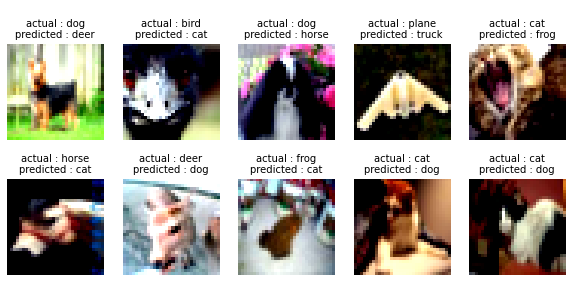

In [ ]:
model = torch.load(f'./saved_models/{experiment_name}.pt')
model.eval()
trigger_training.wrong_predictions(model)

## Plots for Validation Loss and Accuracy

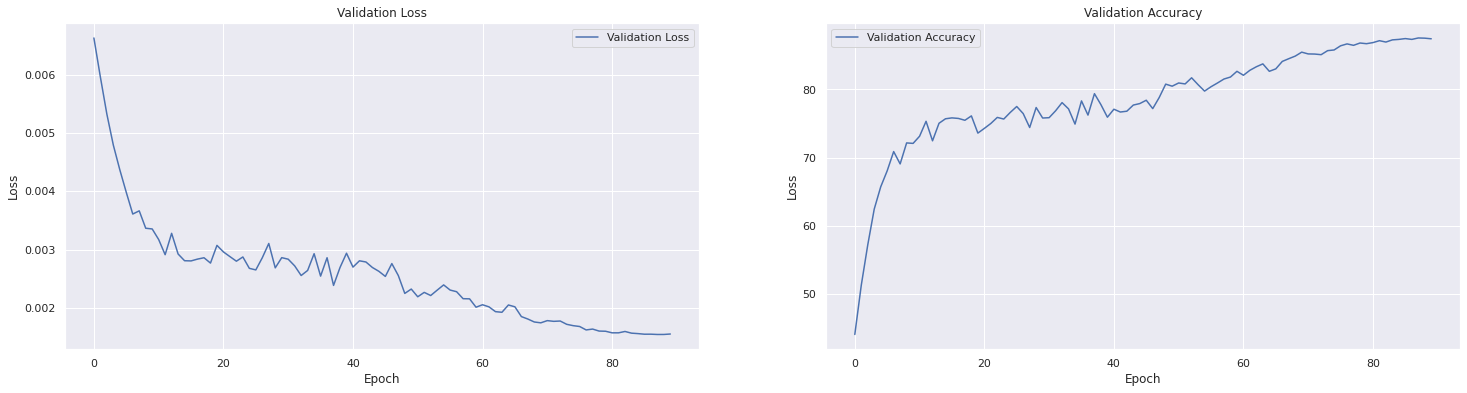

In [ ]:
plot_metrics.plot_metrics(exp_metrics[experiment_name])

## Accuracy for each class

In [ ]:
helper.class_level_accuracy(model, cifar_dataset.test_loader, device, classes)

Accuracy of plane : 89 %
Accuracy of   car : 95 %
Accuracy of  bird : 81 %
Accuracy of   cat : 70 %
Accuracy of  deer : 86 %
Accuracy of   dog : 79 %
Accuracy of  frog : 92 %
Accuracy of horse : 91 %
Accuracy of  ship : 93 %
Accuracy of truck : 94 %
